**KHAN MOHD OWAIS RAZA (20BCD7138)**

---
**`Data Warehousing and Data Mining (CSE4005)`**

---

**`Lab-5`**


***Task-A1:***

**`A python function to return count of each set in the list of element sets.`**

**`Input: Key: (a,b,c), Data: [[a,b,c,d],[b,c,d],[b,c,d,e],[a,b,c,d,e]]  `**

**`Output: (a,b,c) → 2 `**

In [ ]:
from collections import Counter
def count_sets(key, data):
    key_set = frozenset(key)
    set_counts = Counter(frozenset(item) for item in data)
    return key, set_counts[key_set] if key_set in set_counts else 0
input_key = ('a', 'b', 'c')
input_data = [['a', 'b', 'c', 'd'], ['b', 'c', 'd'], ['b', 'c', 'd', 'e'], ['a', 'b', 'c', 'd', 'e']]
result_key, count = count_sets(input_key, input_data)
print(f'{result_key} → {count}')

('a', 'b', 'c') → 0


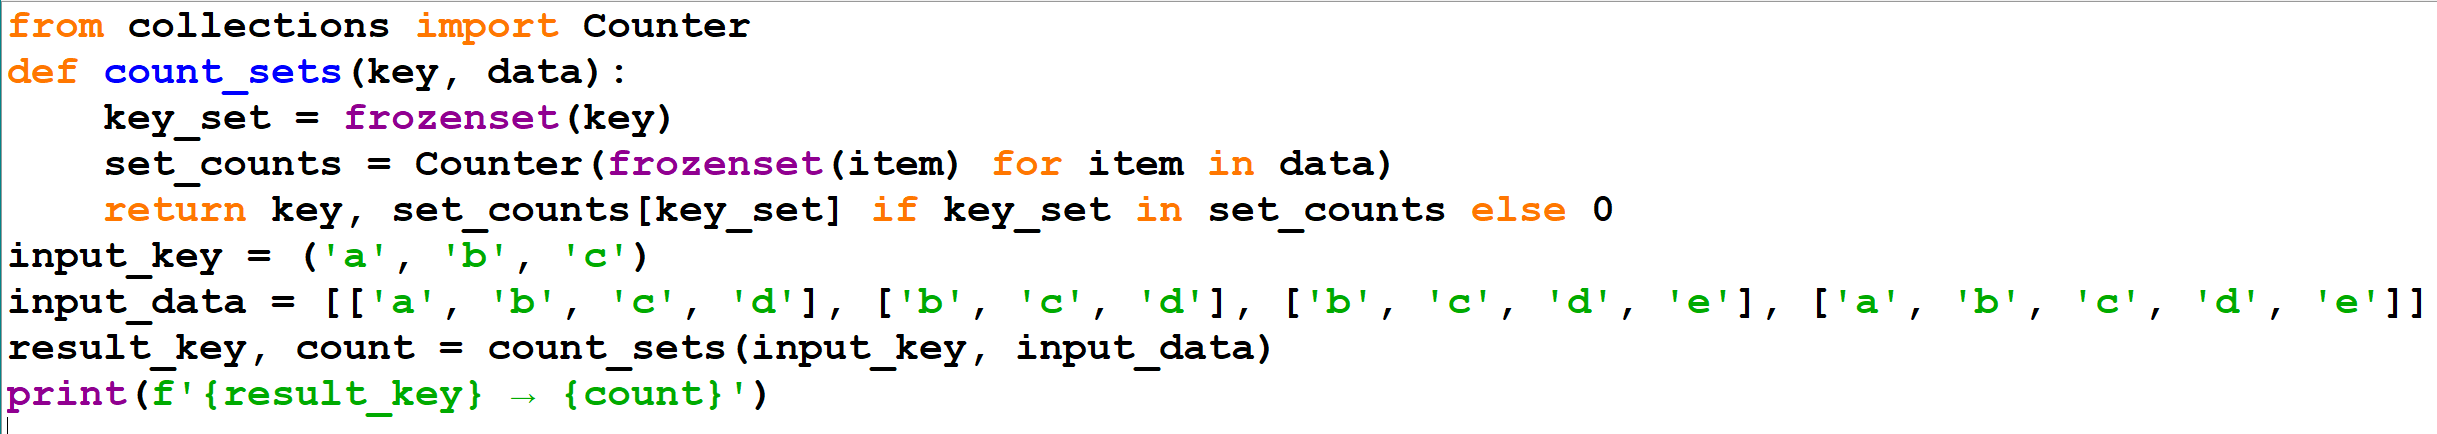

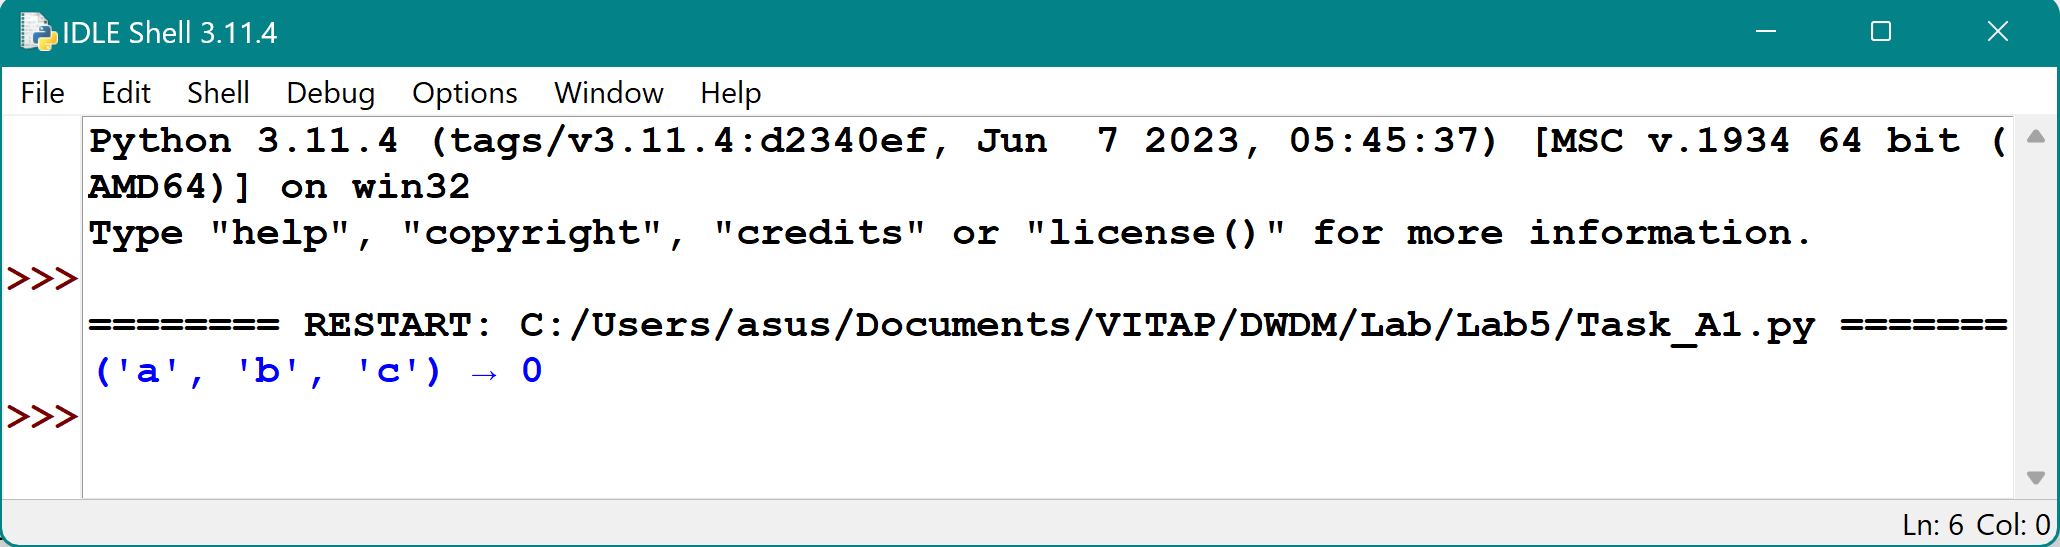

***Task-A2:***

**`A python function to perform self-join operation on a set of items (of size k) to yield unique set of items of size (k+1).  `**

**`Input:((a,b),(a,c),(b,c),(b,d),(c,d),(c,e),(c,f))  `**

**`Output:((a,b,c),(b,c,d),(c,d,e),(c,d,f),(c,e,f))  `**

In [ ]:
from itertools import combinations
def self_join(items, k):
    result = set()
    for combination in combinations(items, k+1):
        if any(set(combination).issubset(item) for item in result):
            continue
        result.add(combination)
    return result
input_data = [('a', 'b'), ('a', 'c'), ('b', 'c'), ('b', 'd'), ('c', 'd'), ('c', 'e'), ('c', 'f')]
output_data = self_join(input_data, 2)
print(output_data)

{(('a', 'c'), ('b', 'c'), ('c', 'd')), (('a', 'c'), ('b', 'c'), ('c', 'f')), (('a', 'c'), ('b', 'd'), ('c', 'e')), (('a', 'c'), ('b', 'c'), ('c', 'e')), (('a', 'c'), ('b', 'd'), ('c', 'd')), (('a', 'c'), ('b', 'd'), ('c', 'f')), (('b', 'd'), ('c', 'd'), ('c', 'e')), (('b', 'd'), ('c', 'd'), ('c', 'f')), (('b', 'd'), ('c', 'e'), ('c', 'f')), (('a', 'b'), ('b', 'c'), ('b', 'd')), (('a', 'c'), ('c', 'd'), ('c', 'e')), (('a', 'c'), ('c', 'd'), ('c', 'f')), (('a', 'c'), ('c', 'e'), ('c', 'f')), (('a', 'b'), ('b', 'c'), ('c', 'd')), (('a', 'b'), ('b', 'c'), ('c', 'f')), (('a', 'b'), ('b', 'd'), ('c', 'e')), (('a', 'b'), ('b', 'c'), ('c', 'e')), (('a', 'b'), ('b', 'd'), ('c', 'd')), (('a', 'b'), ('b', 'd'), ('c', 'f')), (('c', 'd'), ('c', 'e'), ('c', 'f')), (('a', 'b'), ('a', 'c'), ('b', 'd')), (('b', 'c'), ('b', 'd'), ('c', 'f')), (('a', 'b'), ('c', 'd'), ('c', 'e')), (('b', 'c'), ('b', 'd'), ('c', 'e')), (('a', 'b'), ('c', 'd'), ('c', 'f')), (('b', 'c'), ('b', 'd'), ('c', 'd')), (('a', 'b')

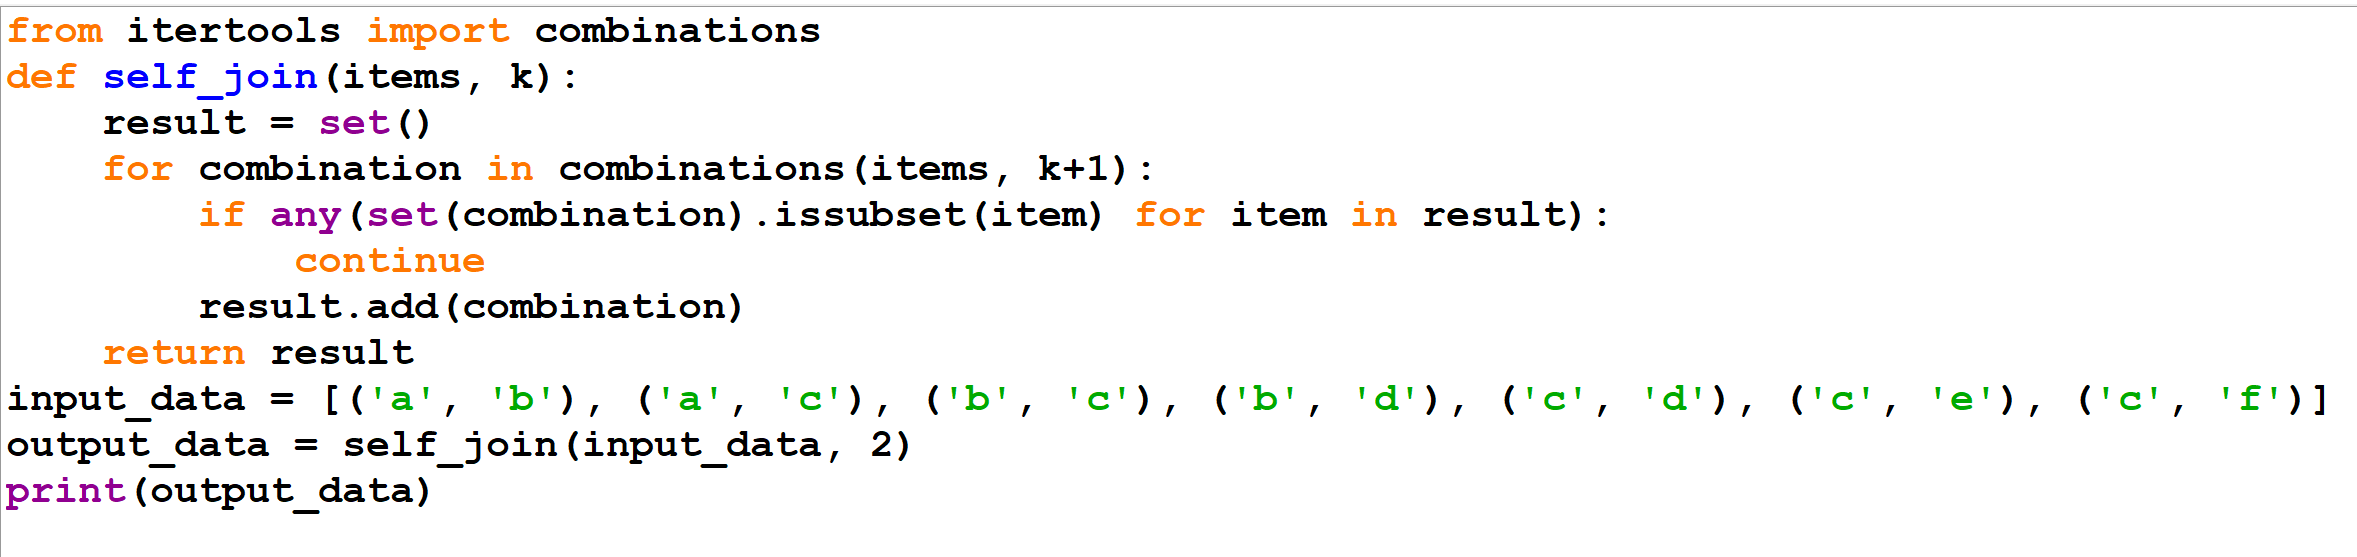

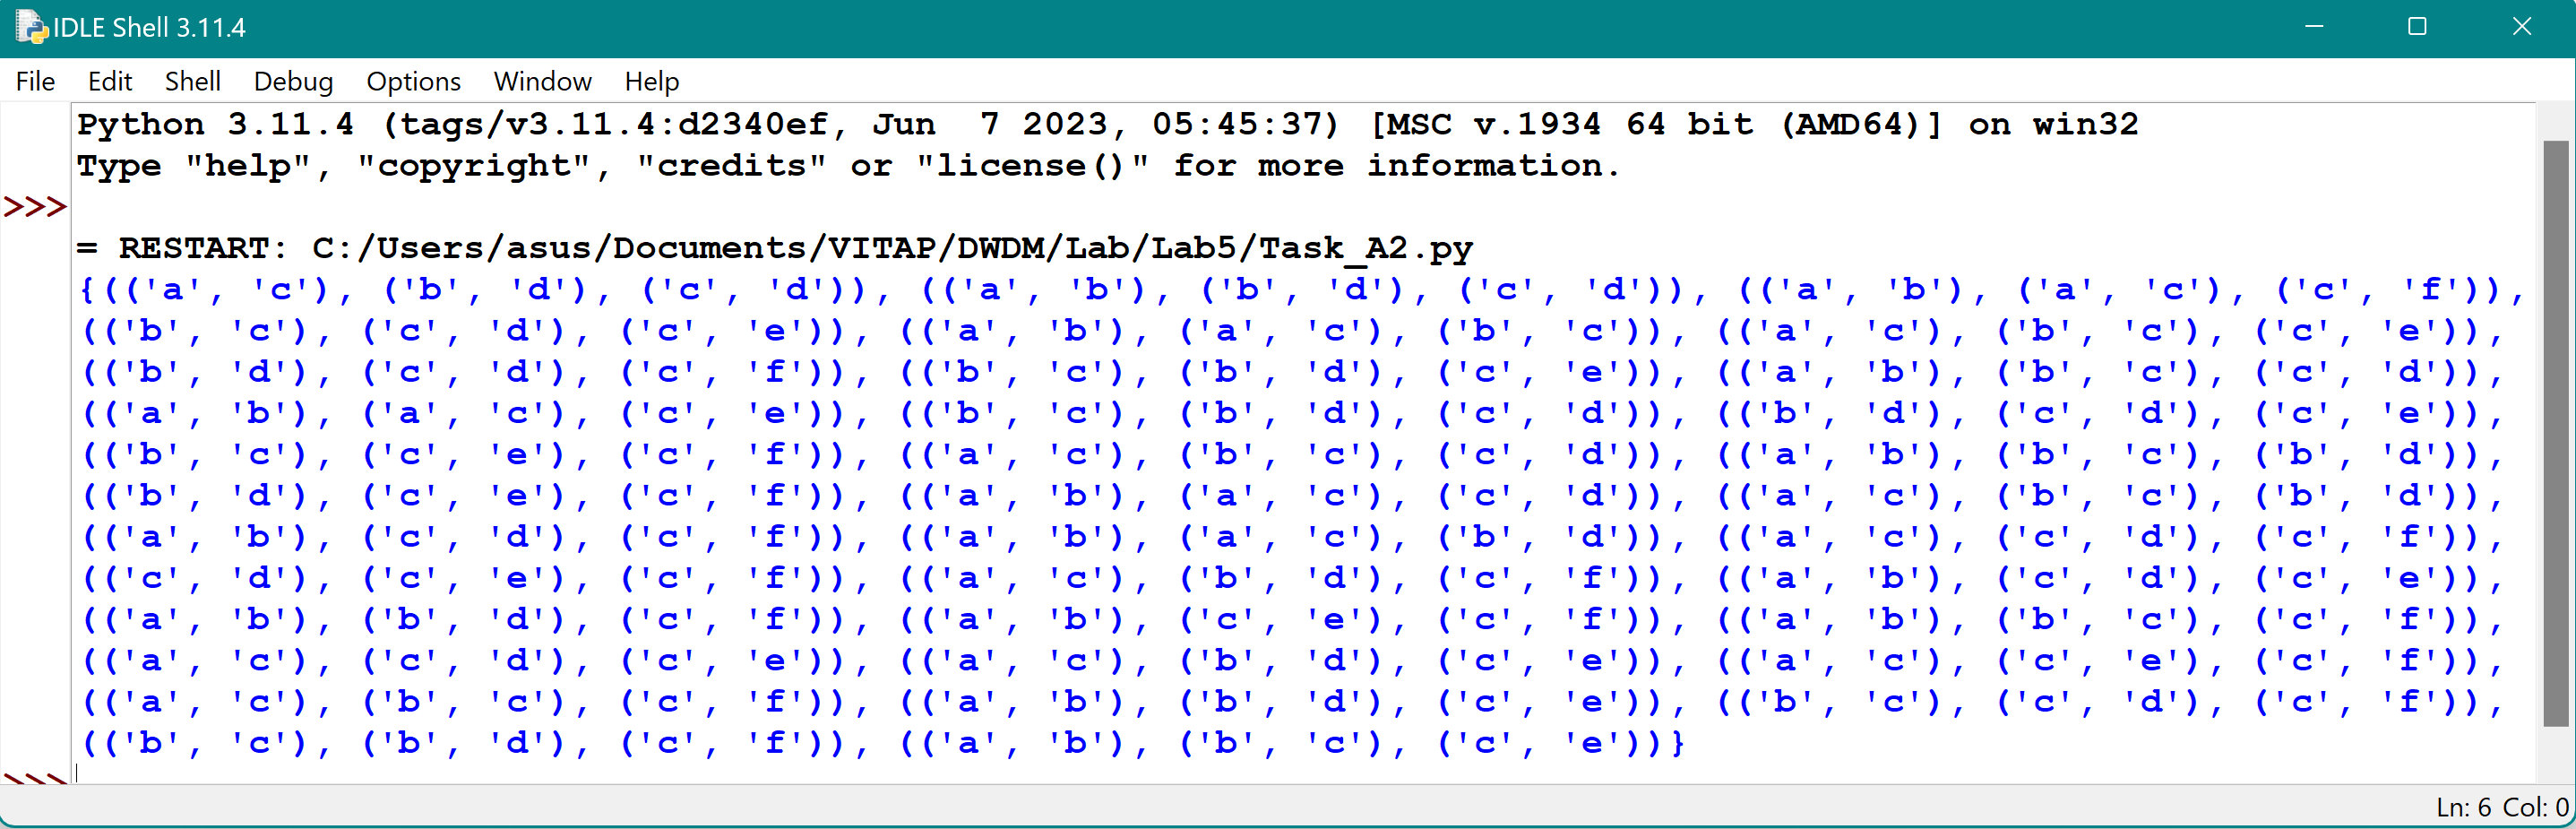

***Task-A3:***

**`A python function to generate nonempty subsets (excluding superset) for a given list of items.  `**

**`Input: [a,b,c]  `**

**`Ouput: [(a),(b),(c),(a,b),(a,c),(b,c)] `**

In [ ]:
from itertools import combinations
def generate_subsets(items):
    subsets = []
    for i in range(1, len(items) + 1):
        subsets.extend(combinations(items, i))
    return subsets
input_items = ['a', 'b', 'c']
output_subsets = generate_subsets(input_items)
print(output_subsets)

[('a',), ('b',), ('c',), ('a', 'b'), ('a', 'c'), ('b', 'c'), ('a', 'b', 'c')]


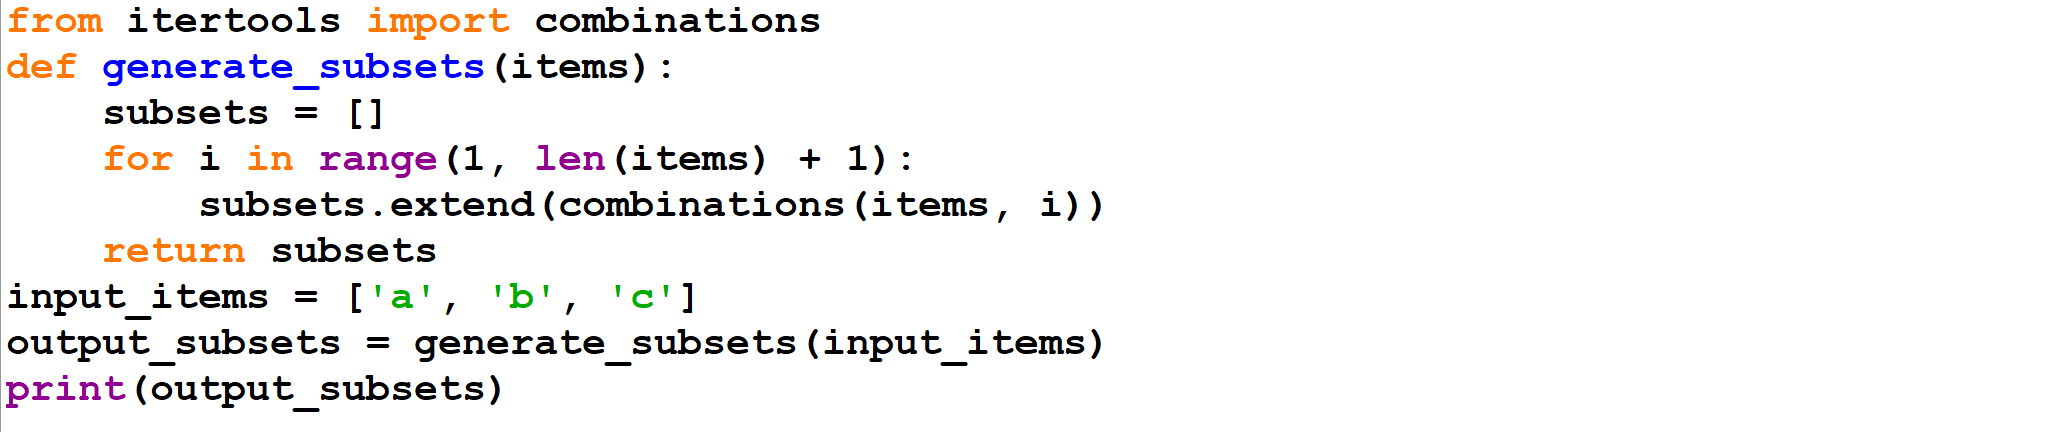

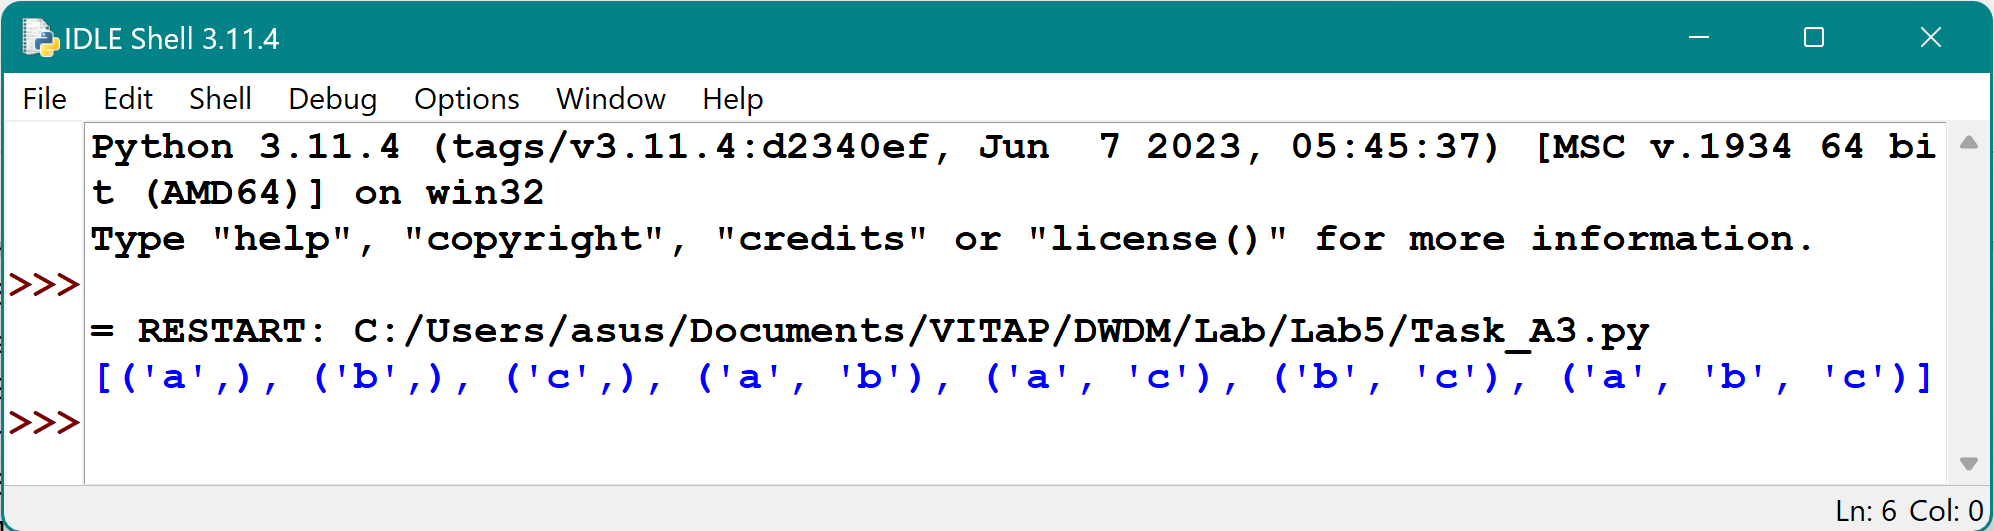

***Task-B:***

**`Extend the above implemented code for any number of transactions, any number of items, user specified thresholds. `**

**`Develop a python code to apply Apriori algorithm for the following database transactions and generate strong association rules with minimum support count = 3 and minimum confidence = 80%.  `**

**`(("a","b","c"), ("a","b"), ("a","b","d"), ("b","e"), ("b","c","e"), ("a","d","e"), ("a","c"), ("a","b","d"), ("c","e"), ("a","b","d","e"), ("a",'b','e','c')). `**

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
transactions = [
    ["a", "b", "c"],
    ["a", "b"],
    ["a", "b", "d"],
    ["b", "e"],
    ["b", "c", "e"],
    ["a", "d", "e"],
    ["a", "c"],
    ["a", "b", "d"],
    ["c", "e"],
    ["a", "b", "d", "e"],
    ["a", "b", "e", "c"]
]
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)
frequent_itemsets = apriori(df, min_support=3/len(df), use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
0         (d)         (a)            0.363636            0.727273  0.363636   
1      (b, d)         (a)            0.272727            0.727273  0.272727   

   confidence   lift  leverage  conviction  zhangs_metric  
0         1.0  1.375  0.099174         inf       0.428571  
1         1.0  1.375  0.074380         inf       0.375000  


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
